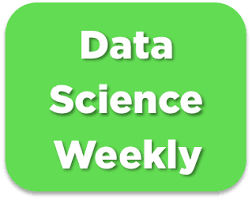

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

In [ ]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


###ANALYSE DU DATASET

---



---



In [ ]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [ ]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

In [ ]:
# Basic stats
print("Number of rows : {}".format(data_sample.shape[0]))
print("Number of columns : {}".format(data_sample.shape[1]))
print()

print("Basics statistics: ")
data_desc = data_sample.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data_sample.isnull().sum()/data_sample.shape[0])

print()
display(data_sample.info())

Number of rows : 10000
Number of columns : 6

Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,5556,NaN,NaN,4916,NaN,NaN
mean,NaN,30.732400,0.686100,NaN,4.840100,0.032900
std,NaN,8.293218,0.464099,NaN,3.290534,0.178384
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000



Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 128121 to 154013
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              10000 non-null  object
 1   age                  10000 non-null  int64 
 2   new_user             10000 non-null  int64 
 3   source               10000 non-null  object
 4   total_pages_visited  10000 non-null  int64 
 5   converted            10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


None

# PREPROCESSING

In [ ]:
features_list = ['country','age','new_user','source','total_pages_visited']
target_variable = ['converted']

numeric_features = [1,4]
categorical_features = [0,2,3]

In [ ]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print('Target : ', Y.columns)

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')
Target :  Index(['converted'], dtype='object')


In [ ]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['China' 19 1 'Seo' 1]
 ['US' 33 1 'Direct' 5]
 ['US' 51 1 'Ads' 2]
 ['China' 17 0 'Seo' 1]
 ['China' 28 1 'Seo' 5]]
[['UK' 34 1 'Ads' 1]
 ['UK' 32 0 'Ads' 5]]

[[0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]]


In [ ]:
print(X_train.shape)
print(X_test.shape)

(227664, 5)
(56916, 5)


In [ ]:
# Create pipeline for numeric features
numeric_features = [1, 4] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # if still missing values we will replace by columns' mean
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = [0, 2, 3] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # if still missing values we will replace by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [ ]:
#OHE
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train and test set
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test) # Don't fit again on test!!

###REGRESSION LOGISTIQUE

In [ ]:
# Train model
classifierR = LogisticRegression(max_iter=200)
classifierR.fit(X_train, Y_train) # Training is always done on train set !!

# Predictions on training set
y_train_pred = classifierR.predict(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Train model
classifierR = LogisticRegression(max_iter=200)
classifierR.fit(X_train, Y_train) # Training is always done on train set !!

# Predictions on training set
y_train_pred = classifierR.predict(X_train)
# Predictions on test set
y_test_pred = classifierR.predict(X_test)

print("f1-score on train set :  ", f1_score(Y_train, y_train_pred))
print("f1-score on test set :  ", f1_score(Y_test, y_test_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



f1-score on train set :   0.7654507084715104
f1-score on test set :   0.7554347826086957


MATRICE DE CONFUSION




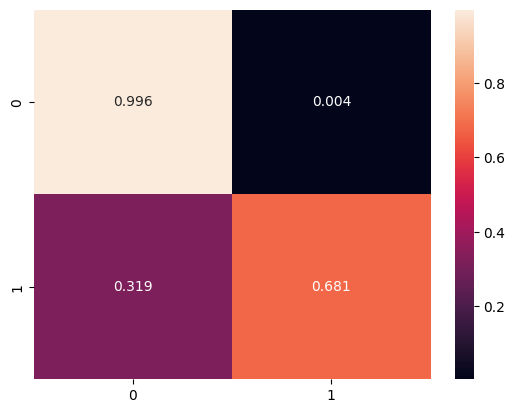

In [ ]:
import seaborn as sns
print('MATRICE DE CONFUSION')
print()
print()
cm = confusion_matrix(Y_test, y_test_pred, normalize="true")
sns.heatmap(cm, annot=True, fmt=".3f");


En analysant les données de test, on observe que 99,6 % des non convertis ont été correctement classés comme tels, tandis que seulement 68 % des convertis ont été correctement classés comme tels. Cependant, il est important de noter un biais de 32 % où les convertis ont été classés à tort comme non convertis.

In [ ]:
###TREE DECISIONS

###TREE DECISIONS

In [ ]:
# Create a random tree
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# Perform grid search
print("Grid search...")
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
gridsearch_1 = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch_1.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_1.best_params_)
print("Best validation accuracy : ", gridsearch_1.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best validation accuracy :  0.9853702532386909


In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch_1.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch_1.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[9.99732719e-01 2.67281414e-04]
 [9.99732719e-01 2.67281414e-04]
 [9.98851046e-01 1.14895363e-03]
 ...
 [9.99732719e-01 2.67281414e-04]
 [9.55789474e-01 4.42105263e-02]
 [9.97541487e-01 2.45851260e-03]]



In [ ]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch_1.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch_1.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[8.64864865e-01 1.35135135e-01]
 [9.98390731e-01 1.60926939e-03]
 [9.98390731e-01 1.60926939e-03]
 ...
 [9.89478114e-01 1.05218855e-02]
 [9.99929984e-01 7.00157535e-05]
 [9.97433759e-01 2.56624110e-03]]



In [ ]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.7605842363868884
f1-score on test set :  0.7496977025392986



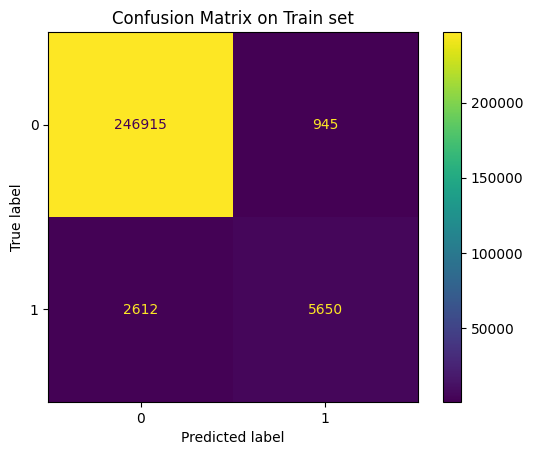

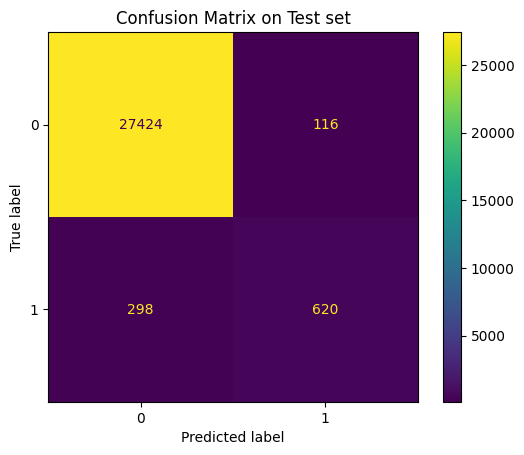

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch_1, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()
print()
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch_1, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

###RANDOM FOREST

In [ ]:
# Perform grid search
print("Grid search...")
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60, 80, ]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 80}
Best validation accuracy :  0.9859949544758753


In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.99665573 0.00334427]
 [0.99534669 0.00465331]
 [0.99890346 0.00109654]
 ...
 [0.98778803 0.01221197]
 [0.94685171 0.05314829]
 [0.99682808 0.00317192]]



In [ ]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[0.83335278 0.16664722]
 [0.99168702 0.00831298]
 [0.98874217 0.01125783]
 ...
 [0.9728839  0.0271161 ]
 [0.99736691 0.00263309]
 [0.99695638 0.00304362]]



In [ ]:
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on training set :  0.7636314067611778
f1-score on test set :  0.7512315270935962



###Utilisons notre meilleur modèle sur toutes les données

In [ ]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifierR.fit(X,Y)

LogisticRegression(max_iter=200)

In [ ]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[16]
 [ 5]
 [ 1]
 [ 6]
 [ 3]]


In [ ]:
data_without_labels.head()

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3


In [ ]:
# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")
print(X_without_labels[0:5,:])

Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [ ]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = feature_encoder.transform(X_without_labels)
print("...Done")
print('X_without_labels')
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
X_without_labels
[[-0.31132378  3.3285935   0.          1.          0.          0.
   0.          1.        ]
 [-1.03650686  0.03743241  0.          1.          0.          1.
   1.          0.        ]
 [ 0.1721316  -1.15935344  0.          0.          0.          1.
   0.          1.        ]
 [ 0.1721316   0.33662888  0.          0.          1.          1.
   0.          0.        ]
 [-0.67391532 -0.56096051  0.          0.          0.          0.
   0.          1.        ]]


In [ ]:
# Make predictions and dump to file
data = {'converted': classifierR.predict(X_without_labels)}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_.csv', index=False)

In [ ]:
Y_predictions.head()

,converted
0,1
1,0
2,0
3,0
4,0
